In [6]:
from glob import glob
import os
from PIL import Image
import staintools
import matplotlib.pyplot as plt
import warnings
import cv2

In [2]:
class_list=['유형1','유형2']
data_path='../../data/origin_type/STNT/'
save_path='../../data/normalization_type/STNT/'

In [28]:
i=0
data_list=glob(data_path+class_list[i]+'/*.jpeg')
j=233
target = staintools.read_image(data_path+'유형1/NIA6_R_STNT_STOP-HY-00001-S-TP-01_6_10.jpeg')
to_transform = staintools.read_image(data_list[j])
warnings.simplefilter('ignore')
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)

transformed_2 = normalizer.transform(to_transform)

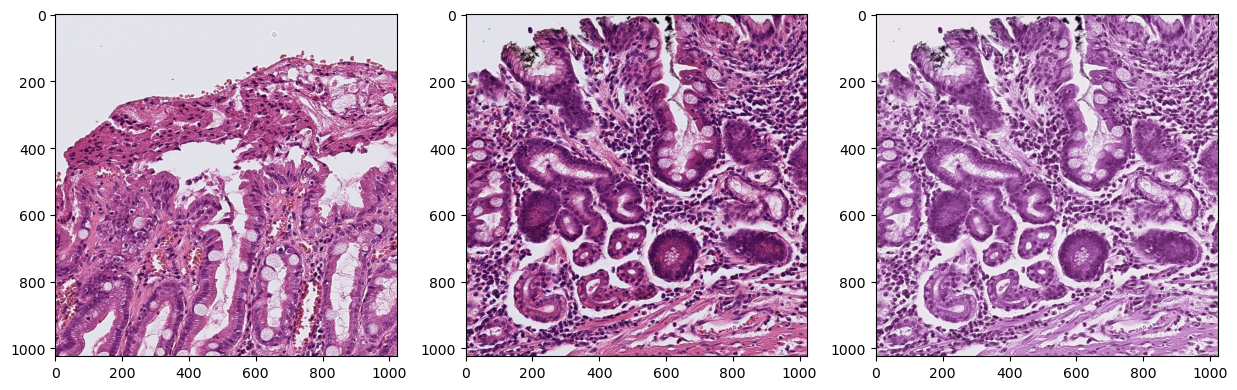

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(target)

plt.subplot(1,3,2)
plt.imshow(to_transform)

plt.subplot(1,3,3)
plt.imshow(transformed_2)